In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Total samples: 592
Training samples: 473
Test samples: 119


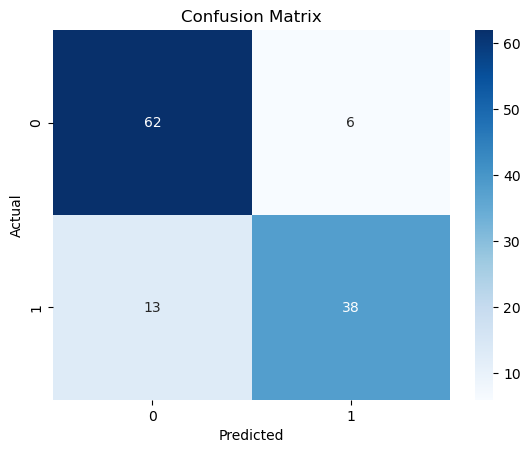

Accuracy: 0.8403361344537815
Confusion Matrix:
 [[62  6]
 [13 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        68
           1       0.86      0.75      0.80        51

    accuracy                           0.84       119
   macro avg       0.85      0.83      0.83       119
weighted avg       0.84      0.84      0.84       119



In [5]:
# Define paths and format types (True if space-separated, False if comma-separated)
file_info = [
    ('data/processed.cleveland.data', False),
    ('data/processed.va.data', False),
    ('data/processed.switzerland.data', False),
    ('data/reprocessed.hungarian.data', True),  # space-separated
]

dataframes = []
for path, is_space_separated in file_info:
    if is_space_separated:
        df = pd.read_csv(path, sep=r'\s+', header=None)
    else:
        df = pd.read_csv(path, header=None)
    dataframes.append(df)

# Combine all files into one DataFrame
data = pd.concat(dataframes, ignore_index=True)

# 3. Handle missing values (replace '?' with NaN, then decide what to do)
data.replace('?', np.nan, inplace=True)
data = data.dropna()

# 4. Separate features (X) and labels (y)
X = data.iloc[:, :-1]  # all columns except the last one are features
y = data.iloc[:, -1]   # last column is the label

# 5. Convert target to binary: 0 (no disease), 1 (disease)
y = y.astype(int)
y = y.apply(lambda val: 1 if val > 0 else 0)

# 5. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 👇 Print dataset sizes
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

# 6. (Optional but good!) Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))